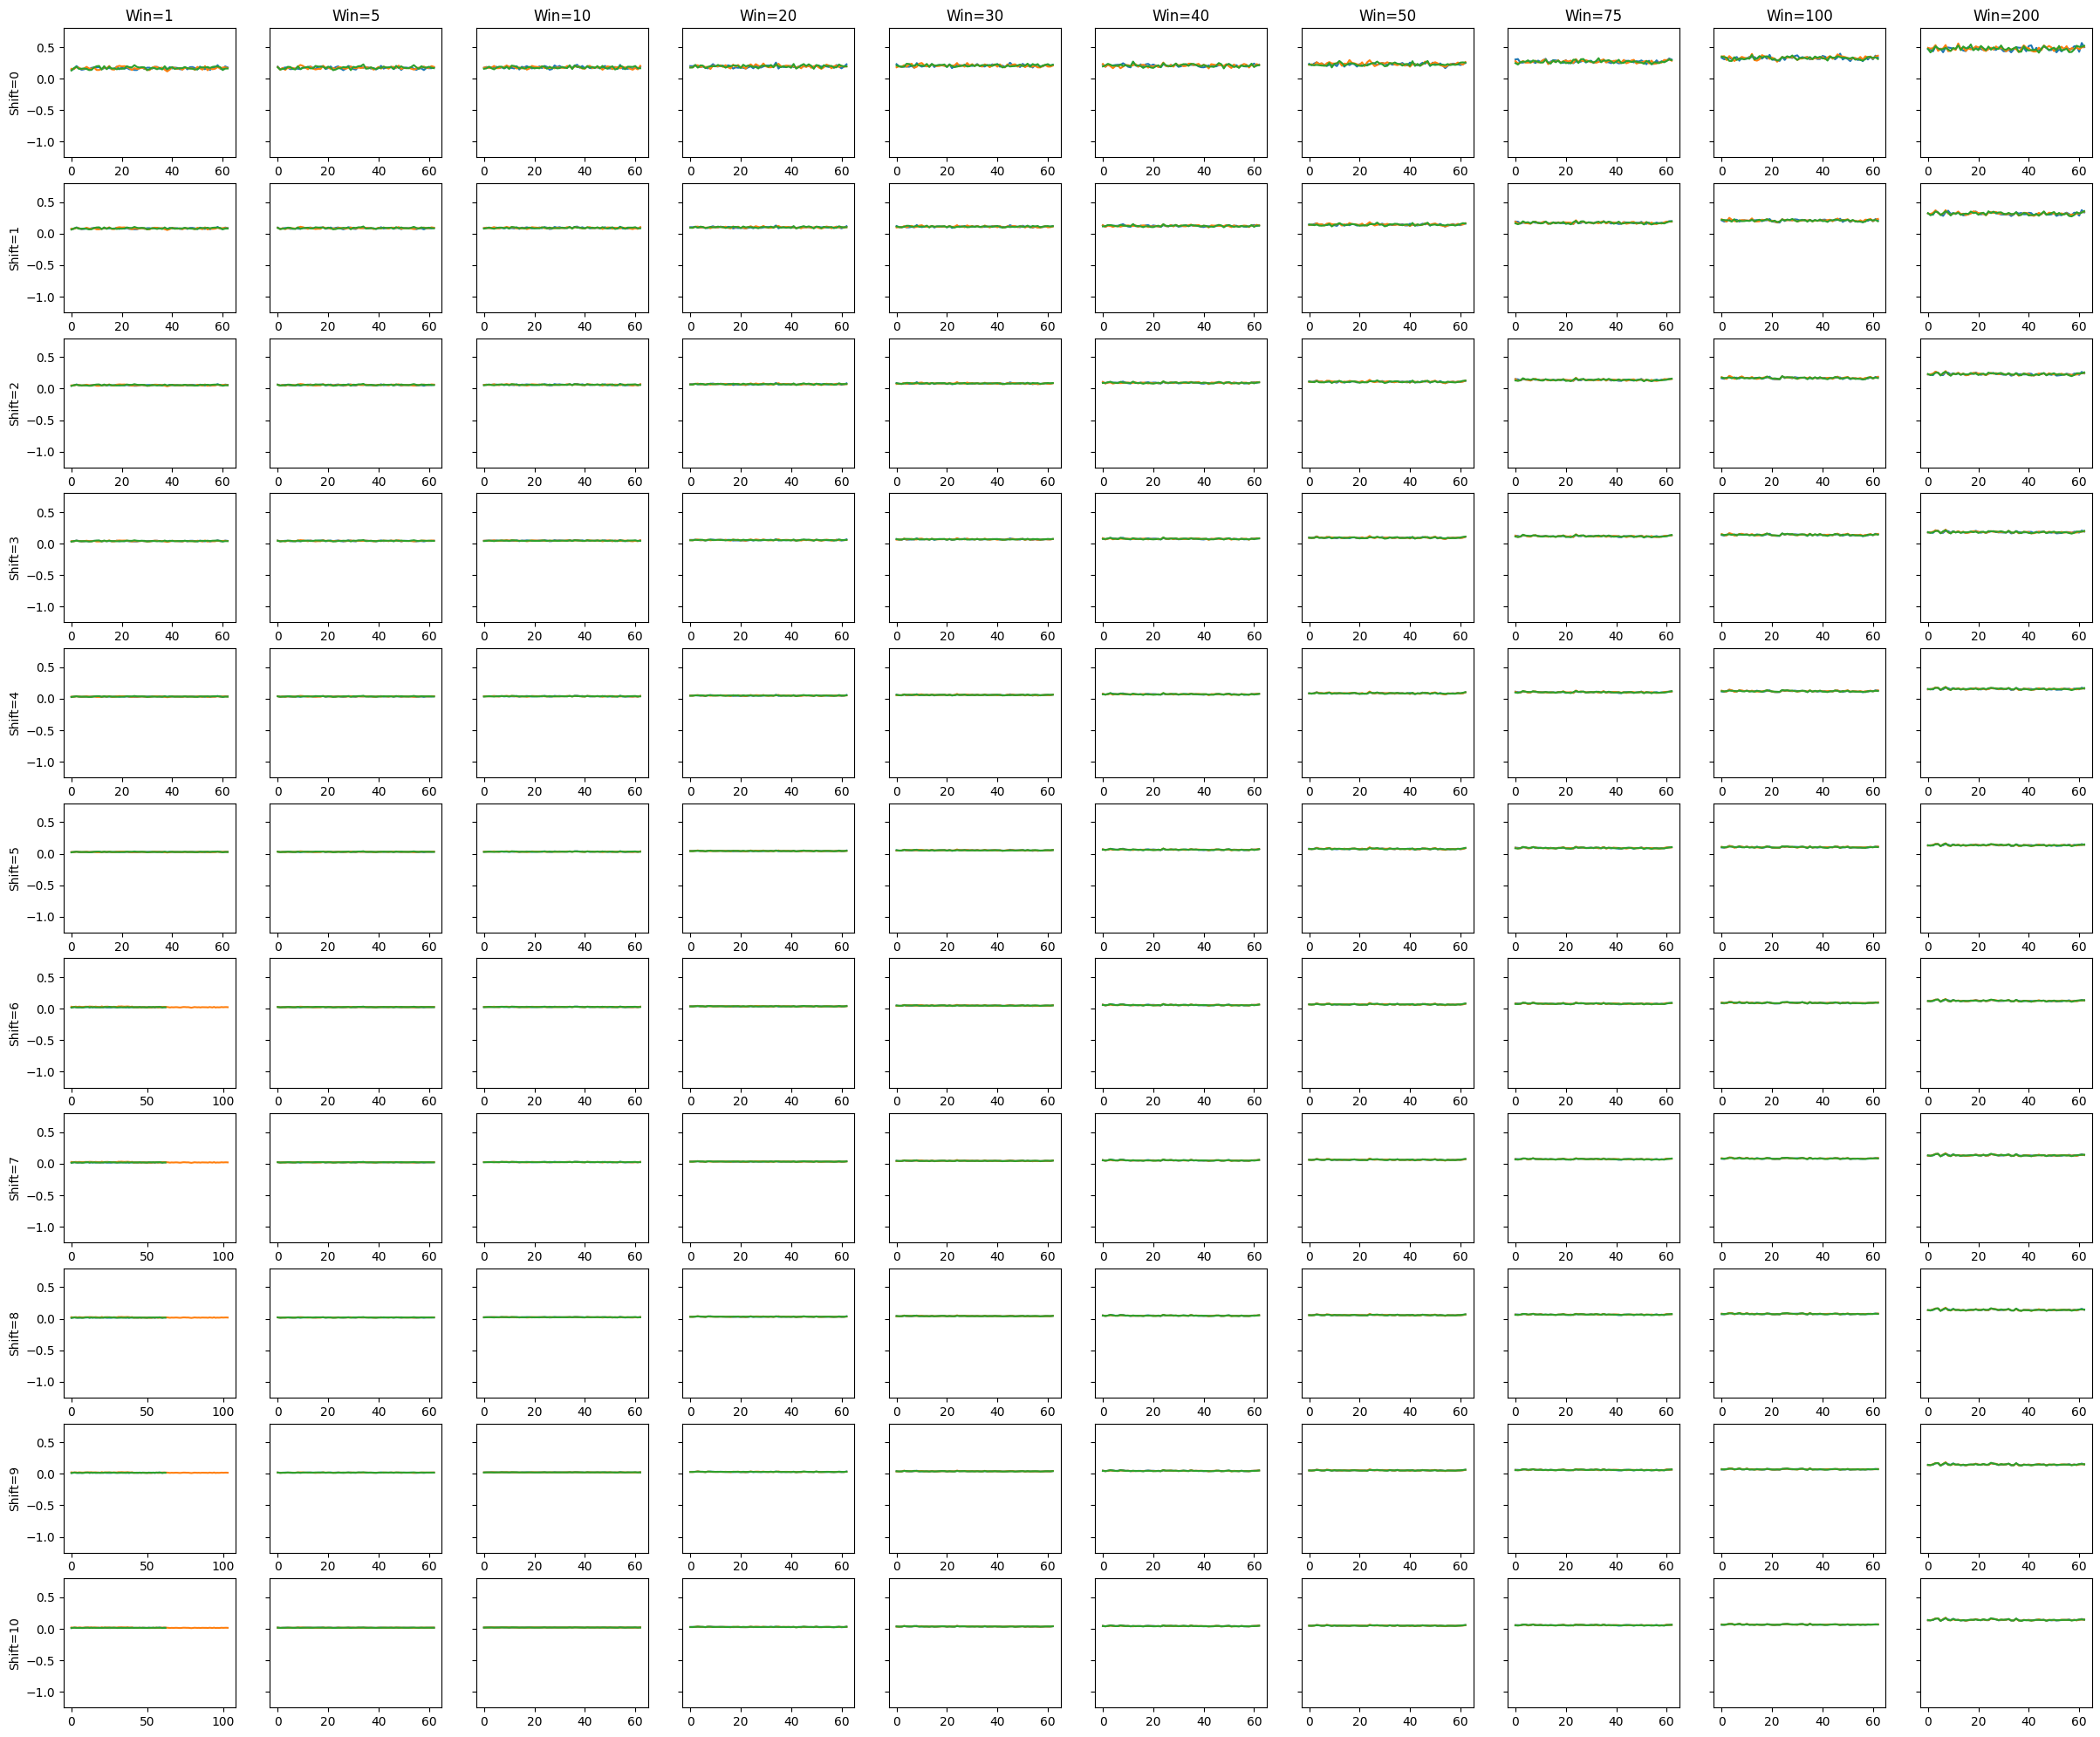

In [24]:
import matplotlib.pyplot as plt
import csv
import pandas as pd

wins = [1,5,10,20,30,40,50,75,100,200]
fig, ax = plt.subplots(11, len(wins),sharey=True,figsize=(30,25))


for i, shift in enumerate(range(0,11)):
    for j, w in enumerate(wins):
        for sent in [12,43,308]:
        # plt.figure()
            d = pd.read_csv("/home/amy/Documents/Research/Makin/outputs/corr/linreg_cs_win_" + str(w)+ "_"+ str(sent) +"_" + str(shift)+ ".csv", header=None)
            d.columns = ["channels", "reg_r2", "pearson_r2"]

            avg_r2 = d['reg_r2'].to_numpy()
            pearson_r2 = d['pearson_r2'].to_numpy()
            # print(avg_r2.shape, pearson_r2.shape)

            # channels = d['channels'].to_numpy()
            # plt.figure()
            # ax[i, j].plot(channels, avg_r2, label=str(sent))
            ax[i, j].plot(avg_r2, label=str(sent))
            ax[0, j].set_title(f"Win={w}")
            ax[i,0].set_ylabel(f"Shift={shift}")
            plt.ylim(-1.25, 0.8)
        # plt.xlabel("channels")
    # plt.title(f"Win = {w}" , fontsize=16)plt.legend()
        # plt.savefig("/home/amy/Documents/Research/Makin/outputs/correlation/linreg_cs_win_" + str(w)+ ".png")
plt.show()

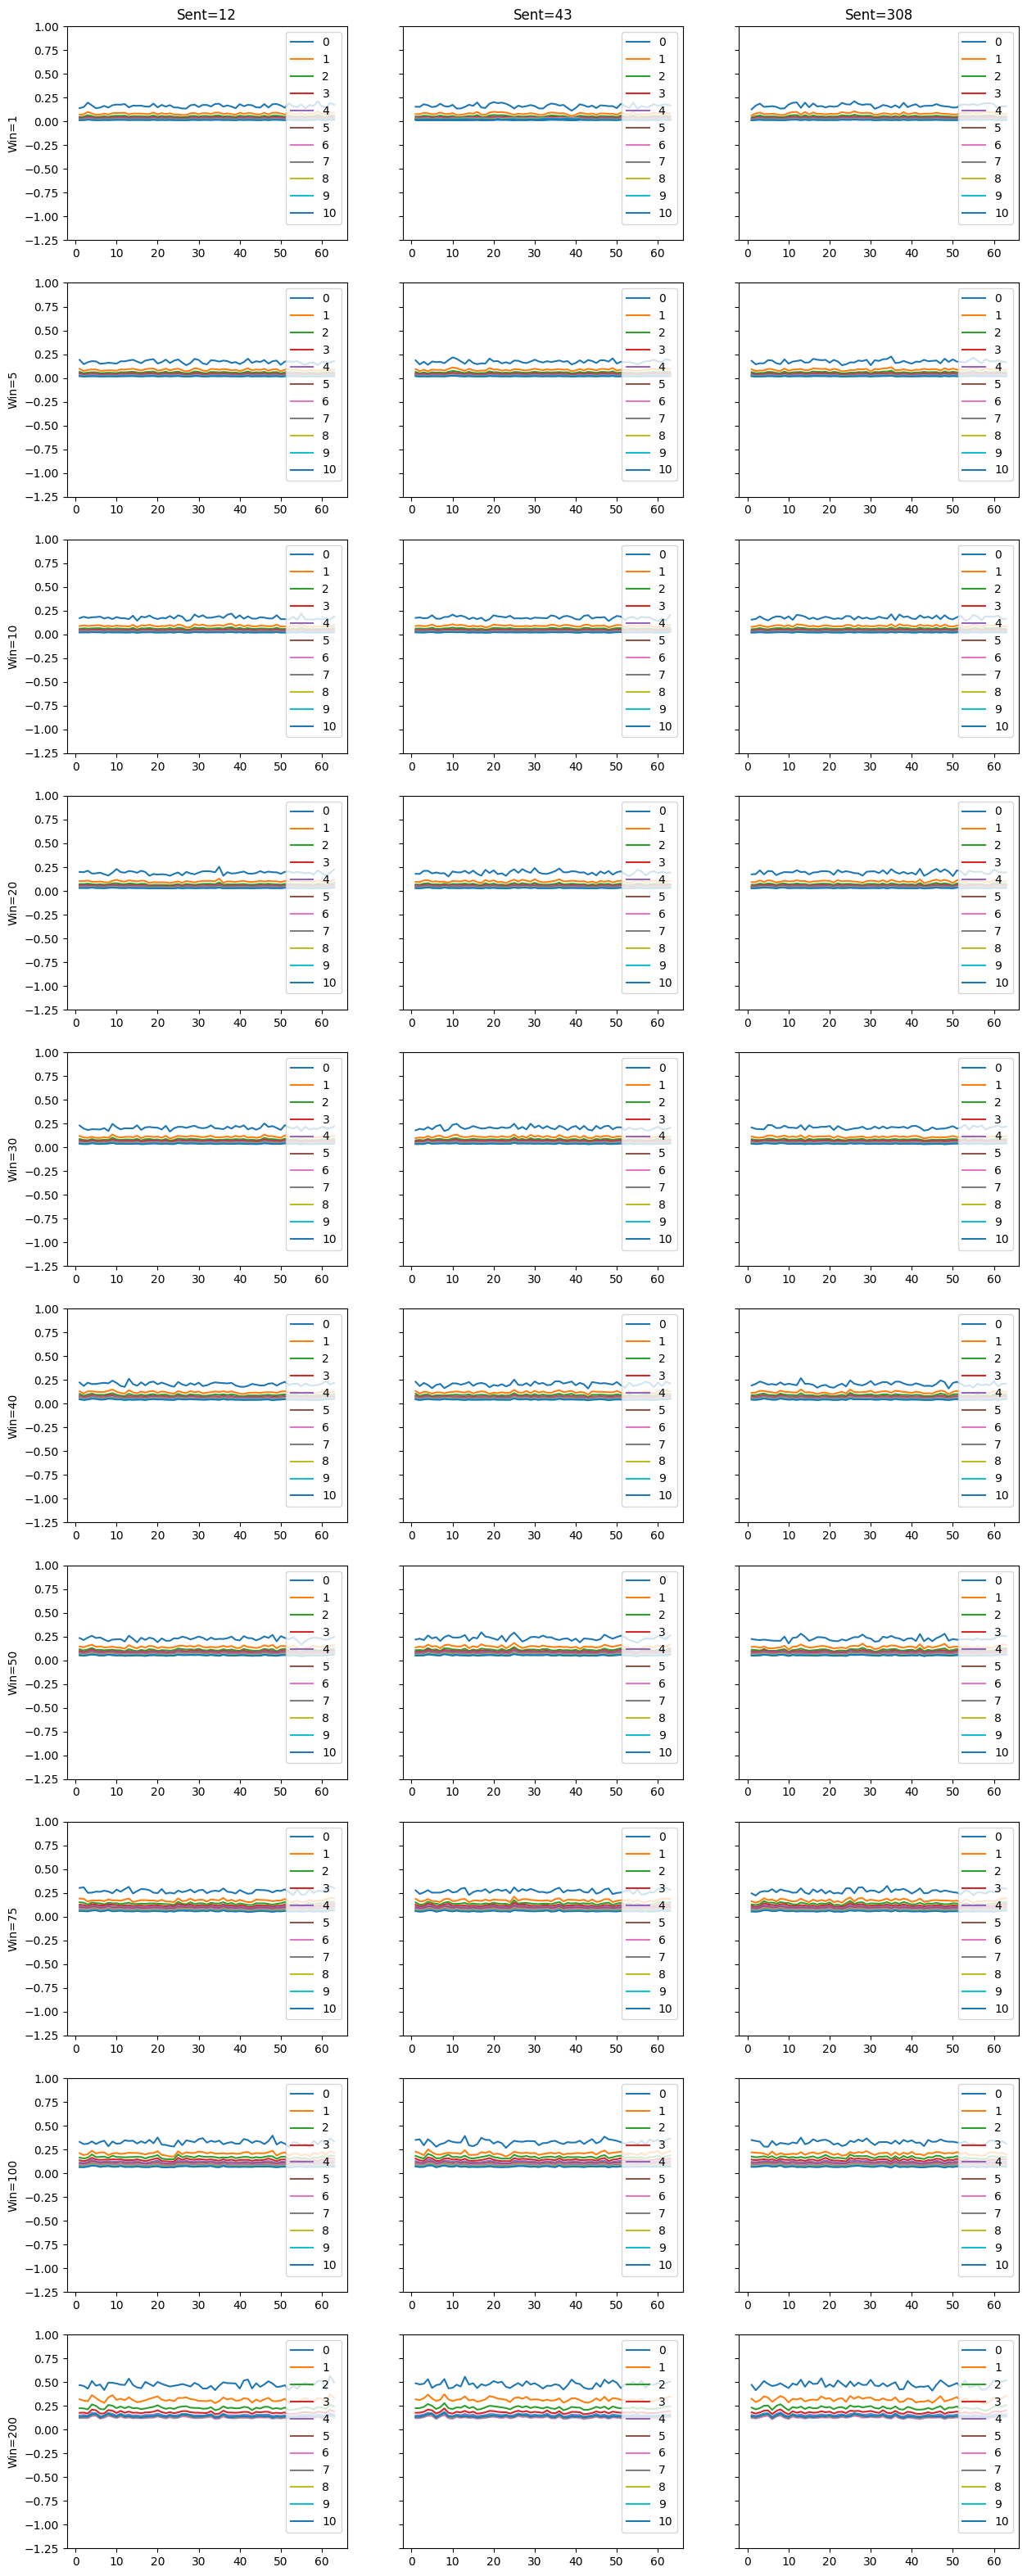

In [23]:
fig, ax = plt.subplots(len(wins), 3,sharey=True,figsize=(15,40))

for i, w in enumerate(wins):
    # plt.figure()
    for j, sent in enumerate([12,43,308]):
        for shift in range(0,11):
            d = pd.read_csv("/home/amy/Documents/Research/Makin/outputs/corr/linreg_cs_win_" + str(w)+ "_"+ str(sent) +"_" + str(shift)+ ".csv", header=None)
            d.columns = ["channels", "reg_r2", "pearson_r2"]

            avg_r2 = d['reg_r2'].to_list()
            pearson_r2 = d['pearson_r2'].to_list()
            channels = d['channels'].to_list()
            # plt.figure()
            ax[i,j].plot(channels, avg_r2, label=str(shift))
            ax[0, j].set_title(f"Sent={sent}")
            ax[i,0].set_ylabel(f"Win={w}")
            # plt.title(f"Win={w}, sent={sent}")
            # ax[i,j].set_ylabel(f"Shift={shift}")
            plt.ylim(-1.25, 1)
            ax[i,j].legend()
        # plt.xlabel("channels")

    # plt.title(f"Win = {w}" , fontsize=16)plt.legend()
        # plt.savefig("/home/amy/Documents/Research/Makin/outputs/correlation/linreg_cs_win_" + str(w)+ ".png")
plt.show()